In [69]:
%pylab inline
import uproot

Populating the interactive namespace from numpy and matplotlib


In [648]:
import random
import awkward0 as ak
from functools import reduce

In [1191]:
from scipy.stats import norm

## Load data files

In [2]:
s500_dm1_file =  uproot.open("mc_392924.SlepSlep_direct_500p5_1p0_2L8.exactly2lep.root")

In [3]:
s100_dm50_file =  uproot.open("mc_392925.SlepSlep_direct_100p0_50p0_2L8.exactly2lep.root")

In [4]:
s200_dm100_file = uproot.open("mc_392936.SlepSlep_direct_200p0_100p0_2L8.exactly2lep.root")

In [16]:
data_file = uproot.open("data_A.exactly2lep.root")

In [22]:
b_ZZ_qqll = uproot.open("mc_363356.ZqqZll.exactly2lep.root")

In [23]:
b_WZ_qqll = uproot.open("mc_363358.WqqZll.exactly2lep.root")

In [24]:
b_dib_llvv = uproot.open("mc_363492.llvv.exactly2lep.root")

In [684]:
b_WW_qqlv = uproot.open("mc_363359.WpqqWmlv.exactly2lep.root")

In [685]:
b_WW_lvqq = uproot.open("mc_363360.WplvWmqq.exactly2lep.root")

In [686]:
b_WZ_lvqq = uproot.open("mc_363489.WlvZqq.exactly2lep.root")

In [746]:
b_tt = uproot.open("mc_410000.ttbar_lep.exactly2lep.root")

In [689]:
e_bg = [b_WW_qqlv, b_WW_lvqq, b_WZ_lvqq]

In [749]:
bg = [b_ZZ_qqll, b_WZ_qqll, b_dib_llvv, b_tt]

In [86]:
sets = [s500_dm1_file, s100_dm50_file, s200_dm100_file]

In [96]:
#files_1 = [data_file, s500_dm1_file]
#files_2 = [data_file, s100_dm50_file]
#files_3 = [data_file, s200_dm100_file]

In [97]:
#files_1.extend(bg)
#files_2.extend(bg)
#files_3.extend(bg)
allfiles = [data_file]
allfiles.extend(sets)
allfiles.extend(bg)

## Functions

In [90]:
SMALL_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize= (7, 5))

In [1265]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure()
    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913', '#03506f', '#ff8e71', '#d8ac9c'])
    ax.set_xlabel(xTitle,labelpad=6)
    ax.set_ylabel(yTitle)
    ax.tick_params(direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(10)
    #ax.xaxis.labelpad = 15
    #ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    return fig, ax

In [668]:
def mt2(file, mdm, indices = None):
    mets = file[b'mini;1'].array(b'met_et')
    mets_phi = file[b'mini;1'].array(b'met_phi')
    lep_pt = file[b'mini;1'].array(b'lep_pt')
    lep_eta = file[b'mini;1'].array(b'lep_eta')
    lep_e = file[b'mini;1'].array(b'lep_E')
    lep_phi = file[b'mini;1'].array(b'lep_phi')
    if indices is not None:
        mets = np.take(mets, indices)
        mets = ak.fromiter(mets)
        mets_phi = np.take(mets_phi, indices)
        mets_phi = ak.fromiter(mets_phi)
        lep_pt = np.take(lep_pt, indices)
        lep_pt = ak.fromiter(lep_pt)
        lep_eta = np.take(lep_eta, indices)
        lep_eta = ak.fromiter(lep_eta)
        lep_phi = np.take(lep_phi, indices)
        lep_phi = ak.fromiter(lep_phi)
        lep_e = np.take(lep_e, indices)
        lep_e = ak.fromiter(lep_e)

    lep_p = np.multiply(lep_pt, np.cosh(lep_eta))
    mpts = np.sqrt(mets**2 - mdm**2)
    lep_et = lep_e*(lep_pt/lep_p)
    
    splittings_mag = []
    for mpt in mpts:
        splittings_mag.append(np.linspace(0, mpt, 10))
    s_phi = np.linspace(0, 2*pi, 10)
    
    mt2 = []
    for i, qs in enumerate(splittings_mag):
        #print(i)
        max_mtq = []
        for q in qs:
            eq = np.sqrt(q**2 + mdm**2)
            vec_mpt = np.array([[mpts[i]*np.cos(mets_phi[i]), mpts[i]*np.sin(mets_phi[i])]]*len(s_phi))
            vec_q = np.column_stack([q*np.cos(s_phi), q*np.sin(s_phi)])
            vec_minq = np.array(vec_mpt - vec_q)
            vec_lep1 = np.array([[lep_pt[i][0]*np.cos(lep_phi[i][0]), lep_pt[i][0]*np.sin(lep_phi[i][0])]]*len(s_phi))
            vec_lep2 = np.array([[lep_pt[i][1]*np.cos(lep_phi[i][1]), lep_pt[i][1]*np.sin(lep_phi[i][1])]]*len(s_phi))
            eqmin = np.sqrt(np.array([sum(x) for x in np.multiply(vec_minq, vec_minq)]) + mdm**2)
            
            p1qt = np.array([sum(x) for x in np.multiply(vec_q, vec_lep1)])
            p2mqt = np.array([sum(x) for x in np.multiply(vec_minq, vec_lep2)])
            
            mtalpha = np.sqrt(2*(lep_et[i][0]*eq - p1qt))
            mtbeta =  np.sqrt(2*(lep_et[i][1]*eqmin - p2mqt))
            #mtalpha = np.where(np.isnan(mtalpha), -1, mtalpha)
            #mtbeta = np.where(np.isnan(mtbeta), -1, mtbeta)
            
            max_mtq.append(np.where(mtalpha >= mtbeta, mtalpha, mtbeta))
        max_mtq = np.array(max_mtq)
        mask = (np.isnan(max_mtq))
        max_mtq[mask] = -1
        max_mtq[mask] = np.max(max_mtq)+1
        mt2.append(np.min(max_mtq))
    return np.array(mt2)

In [895]:
def filter_slep(file, mdm):
    lep_type = file[b'mini;1'].array(b'lep_type')
    lep_char = file[b'mini;1'].array(b'lep_charge')
    mets = file[b'mini;1'].array(b'met_et')
    jets = file[b'mini;1'].array(b'jet_n')
    photons = file[b'mini;1'].array(b'photon_n')
    Rjet = file[b'mini;1'].array(b'largeRjet_n')
    taus = file[b'mini;1'].array(b'tau_n')
    
    lep_ts = np.array([np.sum(lt) for lt in lep_type])
    lep_cs = np.array([np.sum(ls) for ls in lep_char])
    #njets = np.array([np.sum(j) for j in jets])
    
    ind1 = np.where(mets >= mdm)[0]
    ind2 = np.where(lep_ts != 24)[0]
    ind3 = np.where(lep_cs == 0)[0]
    ind4 = np.where(jets == 0)[0]
    ind5 = np.where(photons == 0)[0]
    ind6 = np.where(Rjet == 0)[0]
    ind7 = np.where(taus == 0)[0]
    indices = reduce(np.intersect1d, (ind1, ind2, ind3, ind4, ind5, ind6, ind7))
    return indices

In [281]:
def get_N(file):
    return 1000*file[b'mini;1'].array(b'XSection')/file[b'mini;1'].array(b'SumWeights')

In [1202]:
def get_pval(ratios, errors):
    pvals = []
    for i, rat in enumerate(ratios):
        if rat == 0:
            pvals.append(0)
        else:
            z = (rat - 1)/errors[i]
            if z < 0:
                pvals.append(norm.cdf(z))
            else:
                pvals.append(1-norm.cdf(z))
    return pvals

## Analysis of MC datasets

Look at MET distribution of MC datasets.

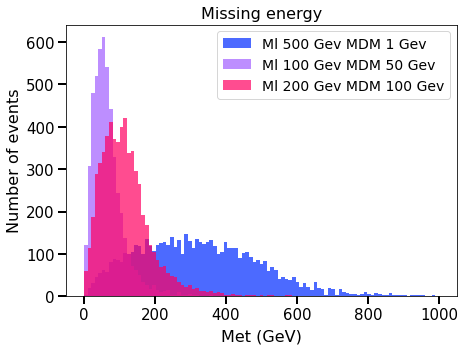

In [94]:
make_fig("Met (GeV)", "Number of events")
title("Missing energy")
nbins   = 100 # number of bins in histogram
xlow    = 0
xhigh   = 1000
bins    = np.linspace(xlow, xhigh, nbins)
for i in range(len(sets)):
    n, bins, patches = plt.hist(sets[i][b'mini;1'].array('met_et')/1e3, bins, alpha = 0.7)
legend(["Ml 500 Gev MDM 1 Gev", "Ml 100 Gev MDM 50 Gev", "Ml 200 Gev MDM 100 Gev"])

We build something called "stransverse mass". Recall regular transverse mass for a 1-> 2 decay:
\begin{align}
m_T = \sqrt{2 (E_{T1}E_{T2} - \mathbf{p_{T1}\cdot p_{T2}})}
\end{align}
or 
\begin{align}
m_T = \sqrt{2 (E_{T1}E_{T2} - |p_{T1}||p_{T2}|\cos(\Delta \phi)}
\end{align}
Where 
\begin{align}
E_T = E\frac{|p_T|}{|p|}
\end{align}
and
\begin{align}
m_T \leq m
\end{align}

Here, we have two $\tilde l-> l + DM$, where the $DM$ goes into $MET$. However, we don't know how the $MET$ is split up between the two unknown $DM$ particles, which means we have to split $\mathbf{p_{T}}^{miss}$ into all possible combinations $\mathbf{q_T}$ and $\mathbf{p_{T}}^{miss} - \mathbf{q_T}$. Then, we define the the $m_{T2}$ variable ("stransverse mass") as:
\begin{align}
m_{T2} = \text{min}_{\mathbf{q_T}}\bigg \{\text{max} \big[m_T(\mathbf{p_T^{\alpha}}, \mathbf{q_T}, MDM), m_T(\mathbf{p_T^{\beta}}, \mathbf{p_{T}}^{miss} - \mathbf{q_T}, MDM)]\big]\bigg\}
\end{align}

Where $\alpha$ and $\beta$ indicate the two respective $\tilde{l} -> l + DM$ decays we are looking at.

Note that we assume $|p_T| \approx |p|$.

$m_{T2}$ satisfies the inequality:
\begin{align}
m_{T2}^2 \leq m_{\tilde l}^2 - MDM^2
\end{align}

In [322]:
mt2_sets = []
mdms = [1e3, 50e3, 100e3]
for i, s in enumerate(sets):
    mt2_sets.append(mt2(s, mdms[i]))

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


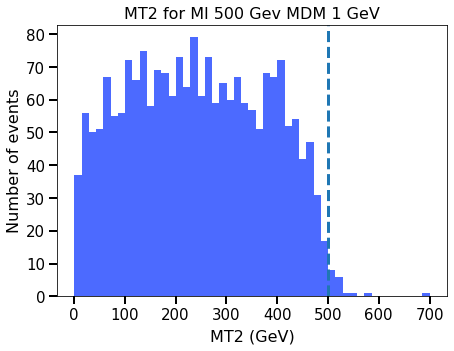

In [653]:
make_fig("MT2 (GeV)", "Number of events")
title("MT2 for Ml 500 Gev MDM 1 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 1
xhigh   = 700
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist(np.take(np.array(mt2_sets[0])/1e3, cut_ind_sets[0]), bins, alpha = 0.7)
axvline(np.sqrt(500**2-(mdms[0]/1e3)**2), linestyle = "--")

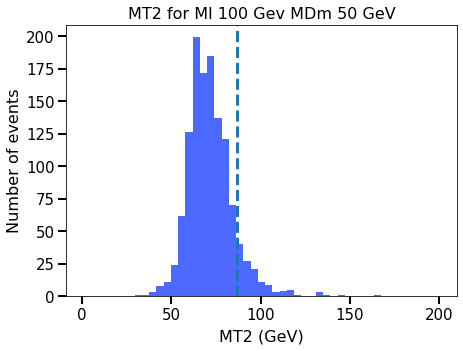

In [654]:
make_fig("MT2 (GeV)", "Number of events")
title("MT2 for Ml 100 Gev MDm 50 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 1
xhigh   = 200
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist(np.take(np.array(mt2_sets[1])/1e3, cut_ind_sets[1]), bins, alpha = 0.7)
axvline(np.sqrt(100**2-(mdms[1]/1e3)**2), linestyle = "--")

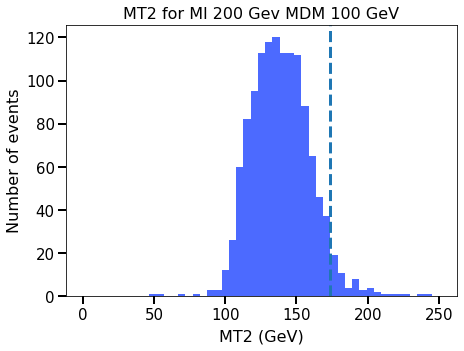

In [655]:
make_fig("MT2 (GeV)", "Number of events")
title("MT2 for Ml 200 Gev MDM 100 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 1
xhigh   = 250
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist(np.take(np.array(mt2_sets[2])/1e3, cut_ind_sets[2]), bins, alpha = 0.7)
axvline(np.sqrt(200**2-(mdms[2]/1e3)**2), linestyle = "--")

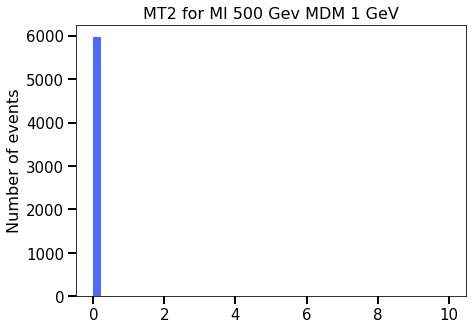

In [642]:
make_fig("", "Number of events")
title("MT2 for Ml 500 Gev MDM 1 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 0
xhigh   = 10
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist([sum(lp) for lp in sets[0][b'mini;1'].array(b'tau_n')], bins, alpha = 0.7)

In [647]:
sets[0][b'mini;1'].array(b'jet_n')

array([1, 1, 0, ..., 0, 0, 1], dtype=uint32)

For all data sets, I will make the cuts that the lepton type should be either two muons or two electrons and the sum of the lepton charge should be -1.

In [286]:
weights = ["scaleFactor_MUON", "scaleFactor_ELE", "scaleFactor_PILEUP", "scaleFactor_LepTRIGGER", "mcWeight"]

## Random sampling of data

In [905]:
# getting indices where data + bg survive the filters
cut_ind_dbg = []
for mdm in mdms:
    mdm_dbg = []
    for file in [data_file] + bg:
        mdm_dbg.append(filter_slep(file, mdm))
    cut_ind_dbg.append(mdm_dbg)

In [652]:
# getting indices where the mc datasets survive filters
cut_ind_sets = []
for i, file in enumerate(sets):
    cut_ind_sets.append(filter_slep(file, mdms[i]))

In [751]:
# getting full sizes of data and background datasets
sizes_databg = []
for file in [data_file] + bg:
    met = file[b'mini;1'].array(b'met_et')
    sizes_databg.append(len(met))

In [944]:
# getting indices that are random samples for data + bg for each mdm
rand_samp_databg = []
for j, mdm in enumerate(mdms):
    mdm_samp = []
    for i, file in enumerate([data_file] + bg):
        if j <=1:
            mdm_samp.append(random.sample(range(0, sizes_databg[i]), 10000*(j+1)))
        else:
            mdm_samp.append(random.sample(range(0, sizes_databg[i]), 100000))
    rand_samp_databg.append(mdm_samp)

In [945]:
cut_ind_dbg = np.array(cut_ind_dbg)
cut_ind_sets = np.array(cut_ind_sets)
rand_samp_databg = np.array(rand_samp_databg)

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [946]:
# intersecting indices that passed filters with random sample indices
fin_ind_dbg = []
for i in range(len(cut_ind_dbg)):
    mdm_ind = []
    for j in range(len(cut_ind_dbg[0])):
        mdm_ind.append(np.intersect1d(cut_ind_dbg[i][j], rand_samp_databg[i][j]))
    fin_ind_dbg.append(mdm_ind)

In [947]:
fin_ind_dbg = np.array(fin_ind_dbg)

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [1147]:
np.save("fin_ind_dbg_whole", fin_ind_dbg)

In [950]:
# calculating mt2 for these indices
mt2_dbg = []
for i in range(len(fin_ind_dbg)):
    mt2_mdm = []
    for j, file in enumerate([data_file] + bg):
        print(f'{i}{j}')
        mt2_mdm.append(mt2(file, mdms[i], fin_ind_dbg[i][j]))
    mt2_dbg.append(mt2_mdm)

00
01
02
03
04
10
11
12
13
14
20
21
22
23
24


In [1148]:
np.save("mt2_dbg", mt2_dbg)

In [786]:
# this was doing the same process for extra background (which I didn't include)
cut_ind_ebg = []
for mdm in mdms:
    mdm_ind_ebg = []
    for file in e_bg:
        mdm_ind_ebg.append(filter_slep(file, mdm))
    cut_ind_ebg.append(mdm_ind_ebg)

In [699]:
cut_ind_ebg = np.array(cut_ind_ebg)

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [700]:
# same process for extra background
mt2_ebg = []
for i in range(len(cut_ind_ebg)):
    mt2_mdm = []
    for j, file in enumerate(e_bg):
        mt2_mdm.append(mt2(file, mdms[i], cut_ind_ebg[i][j]))
    mt2_ebg.append(mt2_mdm)

We want to rescale MC by $\frac{\text{sample data size}}{\text{data size}}\frac{\text{mc size}}{\text{sample mc size}}$. Here, the sample data and sample mc are the same size, so we rescale by mc size/data size.

In [917]:
# weighting
sets_bg_weights = []
for i, file in enumerate(sets + bg):
    e_weight = 1
    N = get_N(file)
    for weight in weights:
        e_weight = e_weight*file[b'mini;1'].array(weight)
    #sets_bg_weights.append(e_weight)
    if i <= 2:
        sets_bg_weights.append(10*multiply(e_weight, N))
    else:
        sets_bg_weights.append(10*(sizes_databg[i-2]/sizes_databg[0])*multiply(e_weight, N))
    #else:
        #sets_bg_weights.append(multiply(e_weight, N))

## ML 500 GeV, MDM 1 GeV

In [952]:
# getting mt2 values for the mc datasets with appropriately filtered indices
mt2_sets_ind = []
for i, mt2i in enumerate(mt2_sets):
    mt2_sets_ind.append(np.take(mt2i, cut_ind_sets[i]))

In [928]:
# getting mc dataset weights with appropriate indices
sets_weights_ind = []
for i in range(len(sets)):
    sets_weights_ind.append(np.take(sets_bg_weights[i], cut_ind_sets[i]))

In [953]:
# getting bg weights with appropriate indices
bg_weights_ind = []
for i in range(len(mdms)):
    mdm_bg_weight = []
    for j in range(len(bg)):
        mdm_bg_weight.append(np.take(sets_bg_weights[j+3], fin_ind_dbg[i][j+1]))
    bg_weights_ind.append(mdm_bg_weight)

In [1038]:
# mt2 combined background
mt2_bg_comb = [np.concatenate(mt2_dbg[i][1:]) for i in range(len(mt2_dbg))]

In [1039]:
#combined background weights
bg_weights_comb = [np.concatenate(bg_weights_ind[i]) for i in range(len(bg_weights_ind))]

In [1261]:
nbins   = 50 # number of bins in histogram
xlow    = 50e3
xhigh   = 600e3
bins    = np.linspace(xlow, xhigh, nbins)

counts, bin_edges = np.histogram(mt2_dbg[0][0], bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
counts = counts

In [1183]:
f1 = (1e4)/sizes_databg[0]

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


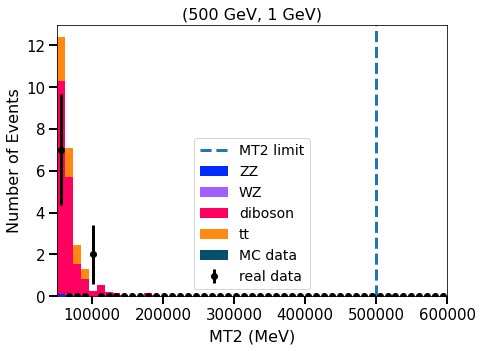

In [1267]:
make_fig("MT2 (MeV)", "Number of Events")
title("(500 GeV, 1 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[0][1:] + mt2_ebg[0] + [mt2_sets_ind[0]], \
                #bins, stacked = True, weights = bg_weights_ind[0] \
                #+ [f1*ewi for ewi in ebg_weights_ind[0]] + [f1*sets_weights_ind[0]])
n, bins, patches = plt.hist(array(mt2_dbg[0][1:] + [mt2_sets_ind[0]]), \
                bins, stacked = True, weights = bg_weights_ind[0] + [f1*sets_weights_ind[0]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(500e3**2-(mdms[0])**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(50e3, 600e3)
savefig("mdm0plt_1.svg")

In [1262]:
counts_b, bin_edges_b = np.histogram(mt2_bg_comb[0], bins, weights = bg_weights_comb[0])

In [1263]:
bin_centers_b = (bin_edges_b[:-1] + bin_edges_b[1:])/2.
err_r = np.sqrt(counts)/counts_b

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


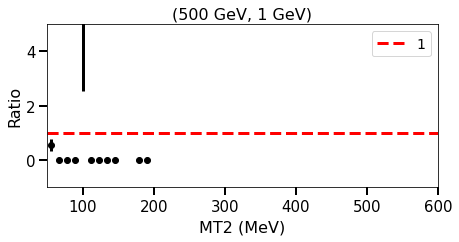

In [1264]:
make_fig("MT2 (MeV)", "Ratio")
title("(500 GeV, 1 GeV)")
errorbar(bin_centers/1e3, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim(-1, 5)
xlim(50, 600)
legend()
savefig("mdm0ratio_1.svg")

In [1244]:
pvals = np.array(get_pval(counts/counts_b, err_r))

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [1245]:
ind_p = np.where((abs(counts/counts_b - 1)>err_r)*(counts != 0)*(counts_b != 0))

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [1246]:
(counts/counts_b)[ind_p]

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.566314  , 8.62117276])

In [1247]:
pvals[ind_p]

array([0.02137578, 0.105618  ])

## ML 100 GeV, MDM 50 GeV

In [1268]:
nbins   = 50 # number of bins in histogram
xlow    = 55e3
xhigh   = 100e3
bins    = np.linspace(xlow, xhigh, nbins)

counts, bin_edges = np.histogram(mt2_dbg[1][0], bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
counts = counts

In [1186]:
f2 = (2e4)/sizes_databg[0]

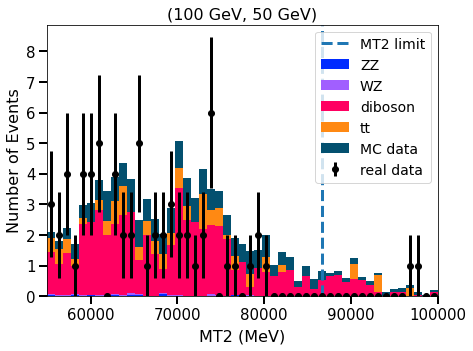

In [1269]:
make_fig("MT2 (MeV)", "Number of Events")
title("(100 GeV, 50 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[1][1:] + mt2_ebg[1] + [mt2_sets_ind[1]], \
                #bins, stacked = True, weights = bg_weights_ind[1] \
                #+ [f2*ewi for ewi in ebg_weights_ind[1]] + [f2*sets_weights_ind[1]])
n, bins, patches = plt.hist(mt2_dbg[1][1:] + [mt2_sets_ind[1]], \
                bins, stacked = True, weights = bg_weights_ind[1] + [f2*sets_weights_ind[1]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(100e3**2-(mdms[1])**2), linestyle = "--")
legend(["MT2 limit","ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim((55e3, 100e3))
savefig("mdm1plt_1.svg")

In [1259]:
counts_b, bin_edges_b = np.histogram(mt2_bg_comb[1], bins, weights = bg_weights_comb[1])
bin_centers_b = (bin_edges_b[:-1] + bin_edges_b[1:])/2.
err_r = np.sqrt(counts)/counts_b

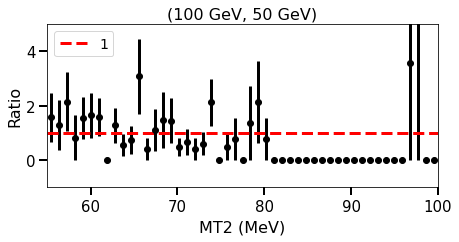

In [1260]:
make_fig("MT2 (MeV)", "Ratio")
title("(100 GeV, 50 GeV)")
errorbar(bin_centers*1e-3, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim((-1, 5))
xlim((55, 100))
legend()
savefig("mdm1ratio.svg")

In [1232]:
pvals = np.array(get_pval(counts/counts_b, err_r))

In [1233]:
ind_p = np.where((abs(counts/counts_b - 1)>err_r)*(counts != 0)*(counts_b != 0))

In [1234]:
(counts/counts_b)[ind_p]

array([2.15348723, 0.55382837, 3.08534653, 0.40869449, 0.4776102 ,
       0.41131919, 2.12451002, 0.49783693])

In [1235]:
ind_p

(array([ 2,  9, 11, 12, 16, 18, 20, 22], dtype=int64),)

In [1236]:
pvals[ind_p]

array([0.14202317, 0.12728703, 0.0653522 , 0.0739743 , 0.06095491,
       0.07618617, 0.09739771, 0.15656169])

## ML 200 GeV, MDM 100 GeV

In [1270]:
nbins   = 50 # number of bins in histogram
xlow    = 50e3
xhigh   = 250e3
bins    = np.linspace(xlow, xhigh, nbins)

counts, bin_edges = np.histogram(mt2_dbg[2][0], bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
counts = counts

In [1189]:
f3 = (10e4)/sizes_databg[0]

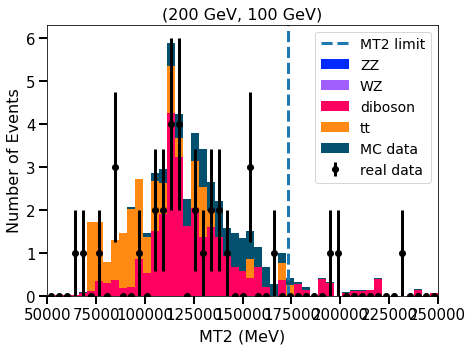

In [1252]:
make_fig("MT2 (MeV)", "Number of Events")
title("(200 GeV, 100 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[2][1:] + mt2_ebg[2] + [mt2_sets_ind[2]], \
                #bins, stacked = True, weights = bg_weights_ind[2] \
                #+ [f3*ewi for ewi in ebg_weights_ind[2]] + [f3*sets_weights_ind[2]])
n, bins, patches = plt.hist(mt2_dbg[2][1:] + [mt2_sets_ind[2]], \
                bins, stacked = True, weights = bg_weights_ind[2] + [f3*sets_weights_ind[2]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(200e3**2-(mdms[2])**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(50e3, 250e3)
savefig("mdm2plt.svg")

In [1253]:
counts_b, bin_edges_b = np.histogram(mt2_bg_comb[2], bins, weights = bg_weights_comb[2])
bin_centers_b = (bin_edges_b[:-1] + bin_edges_b[1:])/2.
err_r = np.sqrt(counts)/counts_b

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


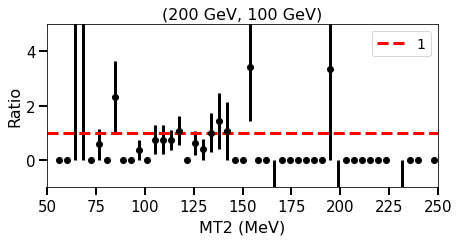

In [1257]:
make_fig("MT2 (MeV)", "Ratio")
title("(200 GeV, 100 GeV)")
errorbar(bin_centers*1e-3, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim((-1, 5))
xlim(50, 250)
savefig("mdm2ratio_1.svg")
legend()

In [1226]:
pvals = get_pval(counts/counts_b, err_r)

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [1223]:
ind_p = np.where((abs(counts/counts_b - 1)>err_r)*(counts != 0)*(counts_b != 0))

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [1224]:
(counts/counts_b)[ind_p]

C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([  0.3676313 ,   0.39357947,   3.43646684, -26.90588115,
       -21.8653766 ,  -5.12040003])

In [1228]:
array(pvals)[ind_p]

array([0.04270562, 0.06168481, 0.10971785, 0.14982911, 0.14784184,
       0.11598546])